# Introducción a las Redes Neuronales
Este cuaderno genera datos 2D etiquetados según si están dentro de un círculo de radio 1, entrena un clasificador lineal (Regresión Logística), evalúa su precisión y visualiza la frontera de decisión para mostrar las limitaciones de modelos lineales en problemas no lineales utilizando una red neuronal.

Objetivos:
- Generar y etiquetar datos sintéticos (círculo unidad).
- Entrenar y evaluar un modelo lineal.
- Visualizar la frontera de decisión y discutir por qué se requieren modelos no lineales.
- Implementar una red neuronal simple para mejorar la clasificación.
- Servir como base para comparar con redes neuronales o MLPs.
 

In [6]:
# importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

## Generación de Datos Sintéticos
Generamos datos 2D aleatorios y los etiquetamos según si están dentro o fuera de un círculo de radio 1.


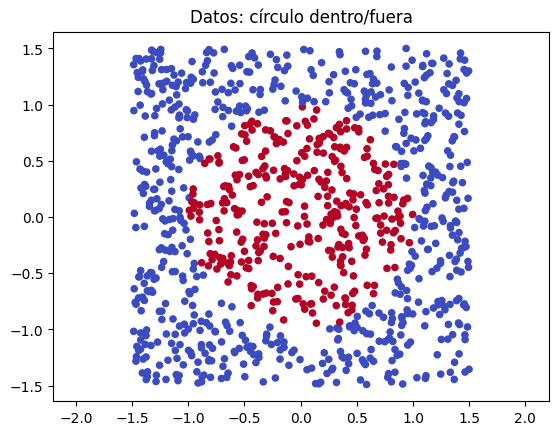

In [7]:
# 1. Generar puntos aleatorios
np.random.seed(42)
n_samples = 1000
X = np.random.uniform(-1.5, 1.5, (n_samples, 2))

# 2. Etiquetar: 1 si está dentro del círculo de radio 1, 0 si no
y = (X[:, 0]**2 + X[:, 1]**2 <= 1).astype(int)

# Visualizar puntos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=20)
plt.axis('equal')
plt.title("Datos: círculo dentro/fuera")
plt.show()


## Clasificación de puntos dentro/fuera de un círculo — comparación de modelos lineales
vamos a entrenar el modelo lineal y dibujar su frontera de decisión.

Precisión en test (modelo lineal): 0.665


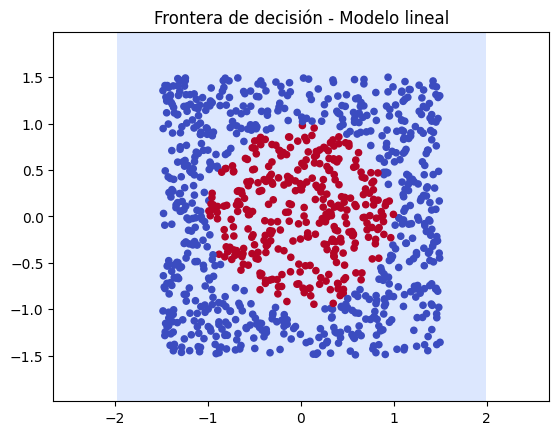

In [8]:
# Paso 2 — Entrenar un clasificador lineal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print("Precisión en test (modelo lineal):", log_reg.score(X_test, y_test))

# Función para graficar la frontera
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # resolución de la malla
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=20)
    plt.axis('equal')
    plt.title(title)
    plt.show()

# Graficar frontera del modelo lineal
plot_decision_boundary(log_reg, X, y, "Frontera de decisión - Modelo lineal")


## red neuronal sencilla (MLP)
En el mismo dataset del círculo vamos a implementar una red neuronal simple.

   - **Estructura:** una capa oculta de, por ejemplo, 10 neuronas con activación ReLU o tanh.
Ver cómo ahora la frontera de decisión se ajusta a la curva.

  - **Conceptualmente:** entender cómo una capa oculta transforma el espacio y el rol de la función de activación en permitir fronteras no lineales.

Precisión en test (red neuronal): 0.97


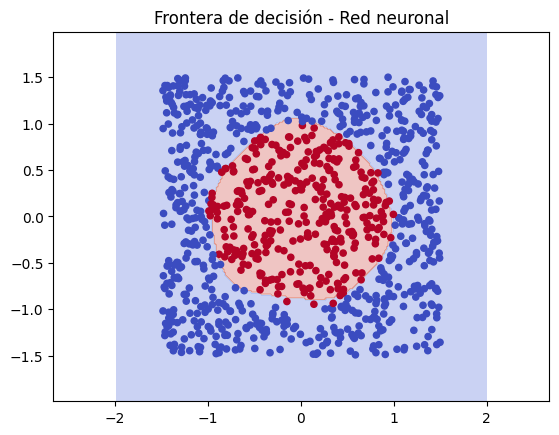

In [9]:
# Paso 3 — Entrenar una red neuronal simple
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='tanh', max_iter=2000, random_state=42)
mlp.fit(X_train, y_train)

print("Precisión en test (red neuronal):", mlp.score(X_test, y_test))

# Graficar frontera
plot_decision_boundary(mlp, X, y, "Frontera de decisión - Red neuronal")
